# Adult Data Set 
## Description
Demographic data extracted from the census bureau containing 48842 entries and 14 attribute.


The column attributes are as follows:

| Id | Attribute |Domain |
| -   | ----------- |----------- |
| 1   | Age | continous |
| 2   | Workclass | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. |
| 3   | Fnlwgt | continuous |
| 4   | Education | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. |
| 5   | Education Number |continuous  |
| 6   | Marital Status | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. |
| 7   | Occupation | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces|
| 8   | Relationship | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried |
| 9   | Race | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black |
| 10  | Sex | Female, Male |
| 11  | Capital Gain | continuous |
| 12  | Capital Loss | continuous |
| 13  | Hours Per Week | continuous |
| 14  | Native Country | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 |

## Importing the Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing main data
headers = ['Age','Workclass','Fnlwgt','Education','Education Number', 'Marital Status','Occupation','Relationship','Race','Sex','Captial Gain','Capital Loss','Hours Per Week','Native Country','Wage Category']
data = pd.read_csv("../../datasets/classification/adult-data", header = None,names=headers, index_col=False)


# Importing and processing test data
headers = ['Age','Workclass','Fnlwgt','Education','Education Number', 'Marital Status','Occupation','Relationship','Race','Sex','Captial Gain','Capital Loss','Hours Per Week','Native Country','Wage Category']
test_data = pd.read_csv("../../datasets/classification/adult-test-data", header = None,names=headers, index_col=False)


## Preparing the Dataset

In [3]:
from sklearn.model_selection import train_test_split

# Processing the main data
data = data.replace("?", np.nan) 
data = data.dropna() 
data = data.replace(' <=50K', 0)
data = data.replace(' >50K', 1)

X = (data.iloc[:,:data.shape[1]-1])
y = (data.iloc[:,data.shape[1]-1:])

X = X.drop('Education',axis=1)
X = X.drop('Native Country', axis=1)
X.Workclass = pd.Categorical(X.Workclass)
X.Workclass = X.Workclass.cat.codes

X['Marital Status'] = pd.Categorical(X['Marital Status'])
X['Marital Status'] = X['Marital Status'].cat.codes

X['Occupation'] = pd.Categorical(X['Occupation'])
X['Occupation'] = X['Occupation'].cat.codes

X['Relationship'] = pd.Categorical(X['Relationship'])
X['Relationship'] = X['Relationship'].cat.codes

X['Race'] = pd.Categorical(X['Race'])
X['Race'] = X['Race'].cat.codes

X['Sex'] = pd.Categorical(X['Sex'])
X['Sex'] = X['Sex'].cat.codes

X = X.to_numpy()
y = y.to_numpy().flatten()


# Processing the test data
test_data = test_data.replace("?", np.nan) 
test_data = test_data.dropna() 
test_data = test_data.replace(' <=50K.', 0)
test_data = test_data.replace(' >50K.', 1)

X_test = (test_data.iloc[:,:test_data.shape[1]-1])
y_test = (test_data.iloc[:,test_data.shape[1]-1:])

X_test['Age'] = pd.to_numeric(X_test['Age'])

X_test = X_test.drop('Education',axis=1)
X_test = X_test.drop('Native Country',axis=1)

X_test.Workclass = pd.Categorical(X_test.Workclass)
X_test.Workclass = X_test.Workclass.cat.codes

X_test['Marital Status'] = pd.Categorical(X_test['Marital Status'])
X_test['Marital Status'] = X_test['Marital Status'].cat.codes

X_test['Occupation'] = pd.Categorical(X_test['Occupation'])
X_test['Occupation'] = X_test['Occupation'].cat.codes

X_test['Relationship'] = pd.Categorical(X_test['Relationship'])
X_test['Relationship'] = X_test['Relationship'].cat.codes

X_test['Race'] = pd.Categorical(X_test['Race'])
X_test['Race'] = X_test['Race'].cat.codes

X_test['Sex'] = pd.Categorical(X_test['Sex'])
X_test['Sex'] = X_test['Sex'].cat.codes

X_test = X_test.to_numpy()
y_test = y_test.to_numpy().flatten()

X_train, X_temp, y_train, y_temp= train_test_split(X, y, train_size=0.80, test_size = 0.20, random_state=0)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, train_size=0.75, test_size = 0.25, random_state=0)
X_test = X_test[:6512,:]
y_test = y_test[:6512]

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


The following block prints the shape and column datatypes of the processed dataset.

In [5]:
print(data.shape)
print(data.dtypes)

(32561, 15)
Age                  int64
Workclass           object
Fnlwgt               int64
Education           object
Education Number     int64
Marital Status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Captial Gain         int64
Capital Loss         int64
Hours Per Week       int64
Native Country      object
Wage Category        int64
dtype: object


## Train on Multiple Classifiers

In [6]:
# Manage imports
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
import sklearn.neighbors
from sklearn.naive_bayes import GaussianNB
from utilities import train_estimators, plot_estimator_scores

### Logistic Regression Classification

Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.01, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.1, max_iter=10000, random_state=0)...
Training LogisticRegression(C=1.0, max_iter=10000, random_state=0)...


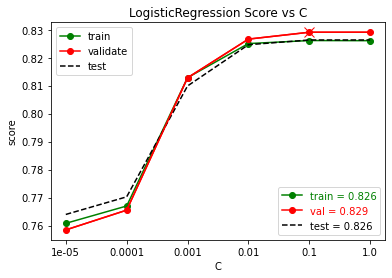

In [7]:
adjusted_parameter = 'C'
adjusted_parameter_values = [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]

LogisticRegressionEstimators = train_estimators(X_train_scaled, y_train,
                                                sklearn.linear_model.LogisticRegression,
                                                adjusted_parameter, adjusted_parameter_values,
                                                max_iter=10000,
                                                random_state=0)
plot_estimator_scores(LogisticRegressionEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

## SVM Classification

Training SVC(C=0.01, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=0.1, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=1.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=10.0, gamma=0.0001, max_iter=10000, random_state=0)...
Training SVC(C=100.0, gamma=0.0001, max_iter=10000, random_state=0)...


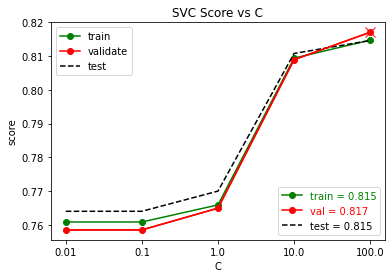

In [8]:
adjusted_parameter = 'C'
adjusted_parameter_values = [0.01, 0.1,1.0,10.0,100.0]

SVMEstimators = train_estimators(X_train_scaled, y_train,
                                    sklearn.svm.SVC,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    max_iter=10000,
                                    random_state=0)
plot_estimator_scores(SVMEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

## Decision Tree Classification

Training DecisionTreeClassifier(max_depth=1, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=5, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=10, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=20, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=50, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=100, splitter='random', random_state=0)...


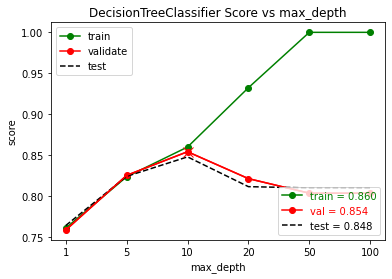

In [9]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

DecisionTreeEstimators = train_estimators(X_train_scaled, y_train,
                                            sklearn.tree.DecisionTreeClassifier,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

## RandomForest Classification

Training RandomForestClassifier(max_depth=1, random_state=0)...
Training RandomForestClassifier(max_depth=5, random_state=0)...
Training RandomForestClassifier(max_depth=10, random_state=0)...
Training RandomForestClassifier(max_depth=20, random_state=0)...
Training RandomForestClassifier(max_depth=50, random_state=0)...
Training RandomForestClassifier(max_depth=100, random_state=0)...


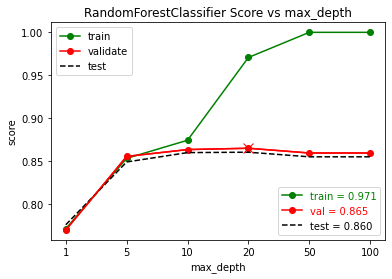

In [11]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

RandomTreeEstimators = train_estimators(X_train_scaled, y_train,
                                        sklearn.ensemble.RandomForestClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

## K-nearest Classification

Training KNeighborsClassifier(weights=uniform, n_neighbors=2)...
Training KNeighborsClassifier(weights=distance, n_neighbors=2)...


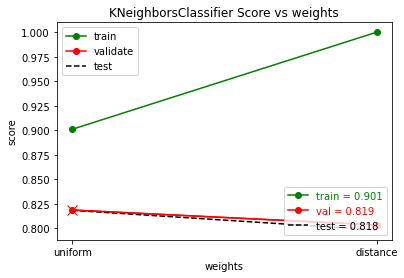

In [12]:
adjusted_parameter = 'weights'
adjusted_parameter_values = ['uniform','distance']

KNearestEstimators = train_estimators(X_train_scaled, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

Training KNeighborsClassifier(algorithm=auto, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=brute, n_neighbors=2)...


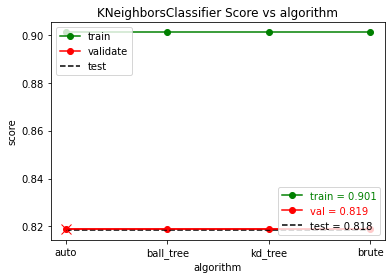

In [14]:
adjusted_parameter = 'algorithm'
adjusted_parameter_values = ['auto', 'ball_tree', 'kd_tree','brute']

KNearestEstimators = train_estimators(X_train_scaled, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

## Ada Boost Classification

In [ ]:
adjusted_parameter = 'n_estimators'
adjusted_parameter_values = [10, 50, 100, 500, 1000, 5000]

AdaBoostEstimators = train_estimators(X_train_scaled, y_train,
                                        sklearn.ensemble.AdaBoostClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

Training AdaBoostClassifier(n_estimators=10, random_state=0)...
Training AdaBoostClassifier(n_estimators=50, random_state=0)...
Training AdaBoostClassifier(n_estimators=100, random_state=0)...
Training AdaBoostClassifier(n_estimators=500, random_state=0)...
Training AdaBoostClassifier(n_estimators=1000, random_state=0)...
Training AdaBoostClassifier(n_estimators=5000, random_state=0)...


## Gaussian Naive Bayes Classification

In [ ]:
clf = GaussianNB()
NaiveBayesEstimator=clf.fit(X_train_scaled, y_train)
NB_training_scores = NaiveBayesEstimator.score(X_train_scaled, y_train)
NB_test_scores =  NaiveBayesEstimator.score(X_test_scaled, y_test)
NB_val_scores =  NaiveBayesEstimator.score(X_val_scaled, y_val)
print(NB_training_scores,NB_val_scores,NB_test_scores)